In [3]:
from __future__ import print_function
__author__= "Yifan_Xie"

In [4]:
import os

from scipy.optimize import curve_fit, minimize

import numpy as np
import pylab as pl
import json
s = json.load( open('fbb_matplotlibrc.json'))
pl.rcParams.update(s)

mysizes = 2000/(np.array(range(1,100)+[10]))
np.random.seed(2015)

In [5]:
### Normal Distribution ###

distributions = ['normal']
mymean = 100

mu = mymean
sigma = 1

md['normal']={} 

for n in mysizes:
    md['normal'][n] = np.random.normal(mu,sigma, size=n)

means['normal'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['normal'].iterkeys():
    means['normal'][nn] = md['normal'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['normal'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysizes), max(mysizes)],[mu,mu], 'k')

NameError: name 'md' is not defined

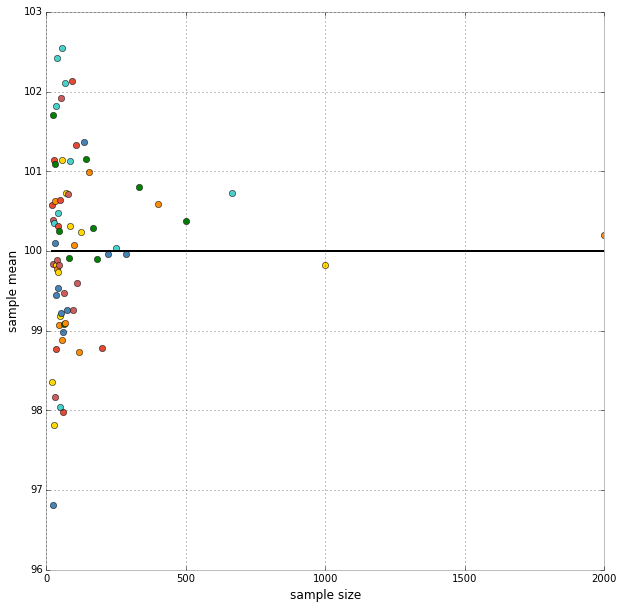

In [88]:
### Poisson Distribution ###

distributions = ['poisson']
mymean = 100

lamb = mymean

md['poisson']={} 

for n in mysizes:
    md['poisson'][n] = np.random.poisson(lamb, size=n)

means['poisson'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['poisson'].iterkeys():
    means['poisson'][nn] = md['poisson'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['poisson'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysizes), max(mysizes)],[lamb,lamb], 'k')

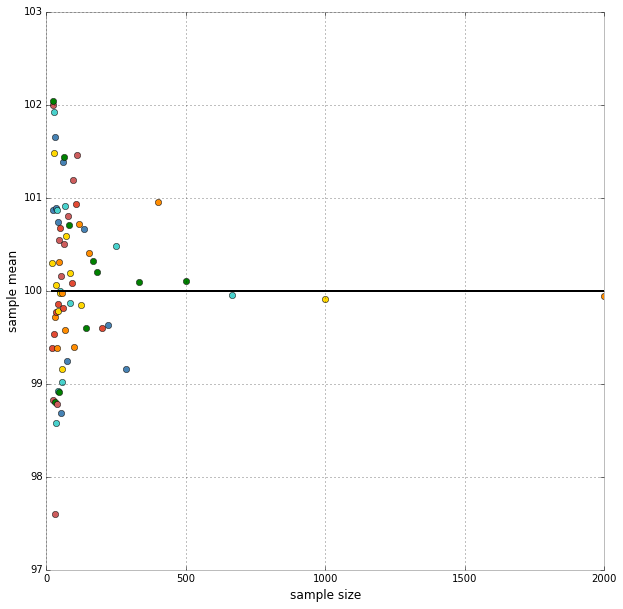

In [89]:
### Binomial Distribution ###

distributions = ['binomial']
mymean = 100

p = 0.5
n = mymean/p

md['binomial']={} 

for m in mysizes:
    md['binomial'][m] = np.random.binomial(n,p,m)

means['binomial'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for mm in md['binomial'].iterkeys():
    means['binomial'][mm] = md['binomial'][mm].mean()
    #and plot it
    axchisq_mu_n.plot(mm, means['binomial'][mm], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysizes), max(mysizes)],[mymean,mymean], 'k')

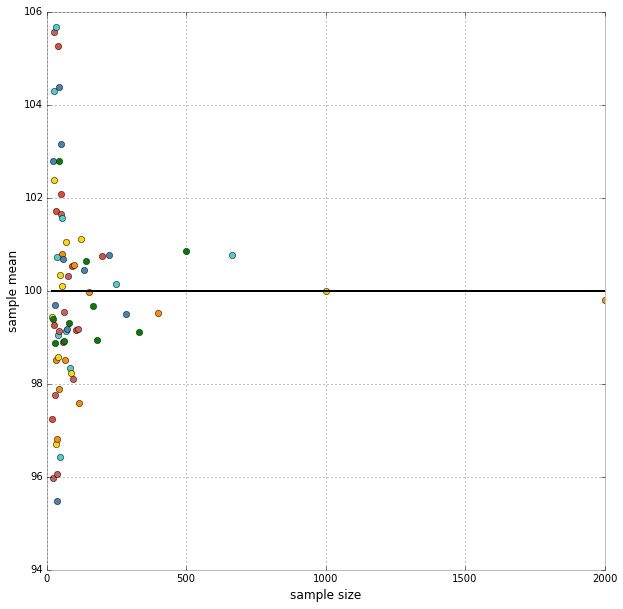

In [90]:
### Chi-square Distribution ###

distributions = ['chisq']
mymean = 100

df = 100

md['chisq']={} 

for n in mysizes:
    md['chisq'][n] = np.random.chisquare(df, size=n)

means['chisq'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['chisq'].iterkeys():
    means['chisq'][nn] = md['chisq'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['chisq'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysizes), max(mysizes)],[df,df], 'k')

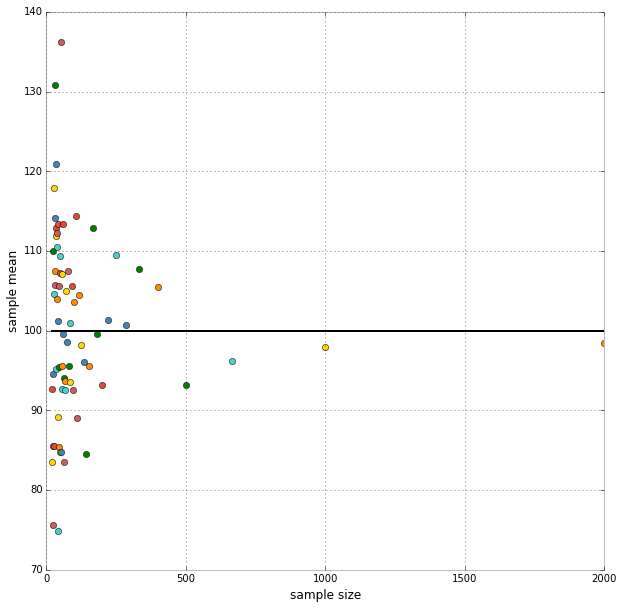

In [91]:
### Exponential Distribution ###

distributions = ['exponential']
mymean = 100

scale = mymean

md['exponential']={} 

for n in mysizes:
    md['exponential'][n] = np.random.exponential(scale, size = n)

means['exponential'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['exponential'].iterkeys():
    means['exponential'][nn] = md['exponential'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['exponential'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysizes), max(mysizes)],[mymean,mymean], 'k')

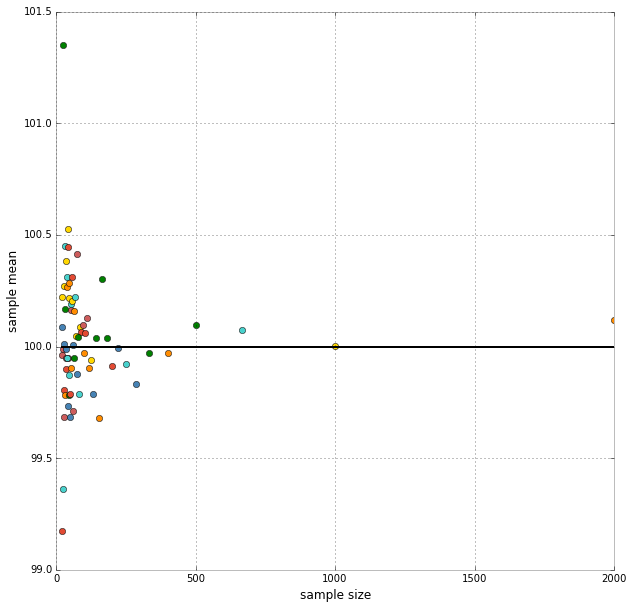

In [92]:
### Logistic Distribution ###

distributions = ['logistic']
mymean = 100

loc = mymean
scale = 1.0

md['logistic']={} 

for n in mysizes:
    md['logistic'][n] = np.random.logistic(loc, scale, size = n)

means['logistic'] = {}
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['logistic'].iterkeys():
    means['logistic'][nn] = md['logistic'][nn].mean()
    #and plot it
    axchisq_mu_n.plot(nn, means['logistic'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysizes), max(mysizes)],[loc,loc], 'k')

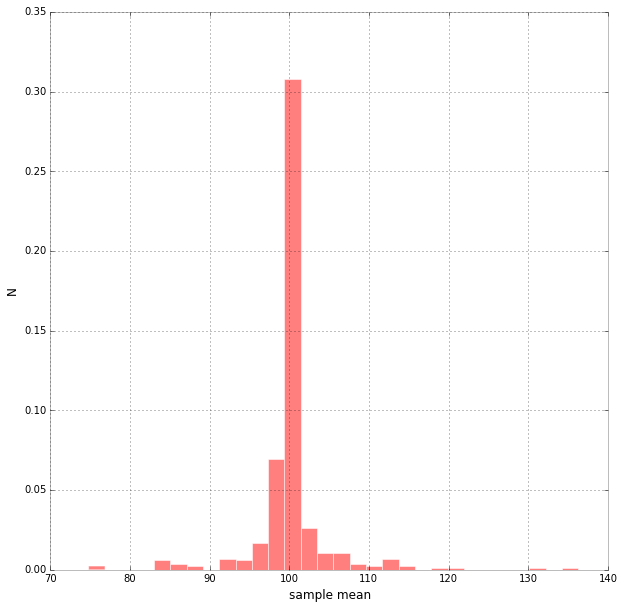

In [95]:
### Plot All Sample Means ###
# Histogram of all sample means

allmeans=[]
for m in means:
    for n in means[m]:
        allmeans.append(means[m][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans, normed=1,alpha=0.5, bins=30, color = 'red')
pl.xlabel('sample mean')
pl.ylabel('N')

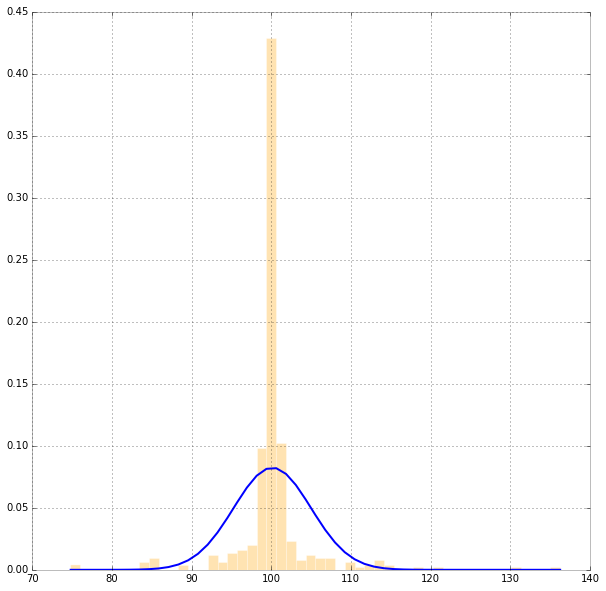

In [100]:
### Optional: Fit a gaussian to the distribution of means

from scipy.stats import norm
import matplotlib.mlab as lab

(mu, sigma) = norm.fit(allmeans)
pl.figure(figsize=(10,10))
n, bins, patches = pl.hist(allmeans,normed=1,bins=50, alpha=0.3, color = 'orange')
y = lab.normpdf( bins, mu, sigma)
l = pl.plot(bins, y, 'r', color = 'blue')